In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install geopandas
!pip install shapely
!pip install shapefile
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shapefile (from versions: none)
ERROR: No matching distribution found for shapefile
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# import shapefile as shp
import plotly_express as px
from shapely.geometry import Point
sns.set_style('whitegrid')

# Question 1
Draw the map of India and use a bubble map to show the populations of all the state capital of India.


In [7]:
fp = r'/content/Shape file india/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<Axes: >

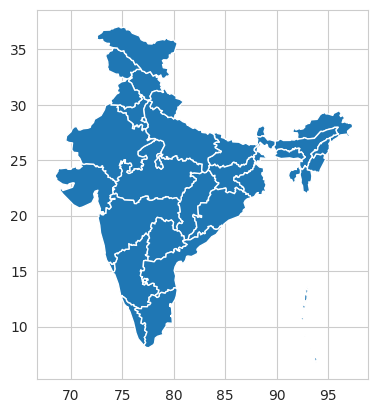

In [8]:
map_df.plot()

In [9]:
# Create a dataframe with state capitals and their populations
capitals = {"State": ["Andhra Pradesh", "Arunachal Pradesh", "Assam", "Bihar", "Chhattisgarh", "Goa", "Gujarat", "Haryana", "Himachal Pradesh", "Jammu and Kashmir", "Jharkhand", "Karnataka", "Kerala", "Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Odisha", "Punjab", "Rajasthan", "Sikkim", "Tamil Nadu", "Telangana", "Tripura", "Uttar Pradesh", "Uttarakhand", "West Bengal", "Ladakh"], 
            "Capital": ["Amaravati", "Itanagar", "Dispur", "Patna", "Raipur", "Panaji", "Gandhinagar", "Chandigarh", "Shimla", "Srinagar",  "Ranchi", "Bengaluru", "Thiruvananthapuram", "Bhopal", "Mumbai", "Imphal", "Shillong", "Aizawl", "Kohima", "Bhubaneswar", "Chandigarh", "Jaipur", "Gangtok", "Chennai", "Hyderabad", "Agartala", "Lucknow", "Dehradun", "Kolkata", "Ladakh"],
            "Population": [9502799, 138000, 31000000, 104000000, 25000000, 1458497, 60439692, 25351462, 6864602, 232000,32988134, 61130704, 33406061, 72626809, 112374333, 2721756, 2966889, 1097206, 1978502, 41947358, 27743338, 68548437, 607688, 72147030, 35003674, 3671032, 21994518, 10116752, 91276115, 274289]}

capital_pop = pd.DataFrame(capitals)

# Merge the map data with the capital populations data
map_with_pop = map_df.merge(capital_pop, left_on='st_nm', right_on='State')
# map_with_pop.head()

In [10]:
map_with_pop_bubble = map_with_pop.copy()
map_with_pop_bubble['geometry'] = map_with_pop_bubble['geometry'].centroid

#Reducing by 100000 to make the size of bubbles easy to see else the bubbles overlaps
map_with_pop_bubble['Population_reduced'] = map_with_pop_bubble['Population']/100000
map_with_pop_bubble.head()

<ipython-input-10-6f7f49c214b6>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_with_pop_bubble['geometry'] = map_with_pop_bubble['geometry'].centroid


,id,st_nm,geometry,State,Capital,Population,Population_reduced
0,NaN,Arunachal Pradesh,POINT (94.68301 28.03104),Arunachal Pradesh,Itanagar,138000,1.38000
1,NaN,Assam,POINT (92.82483 26.34629),Assam,Dispur,31000000,310.00000
2,NaN,Bihar,POINT (85.60699 25.67629),Bihar,Patna,104000000,1040.00000
3,NaN,Chhattisgarh,POINT (82.04299 21.26726),Chhattisgarh,Raipur,25000000,250.00000
4,NaN,Goa,POINT (74.04990 15.37390),Goa,Panaji,1458497,14.58497


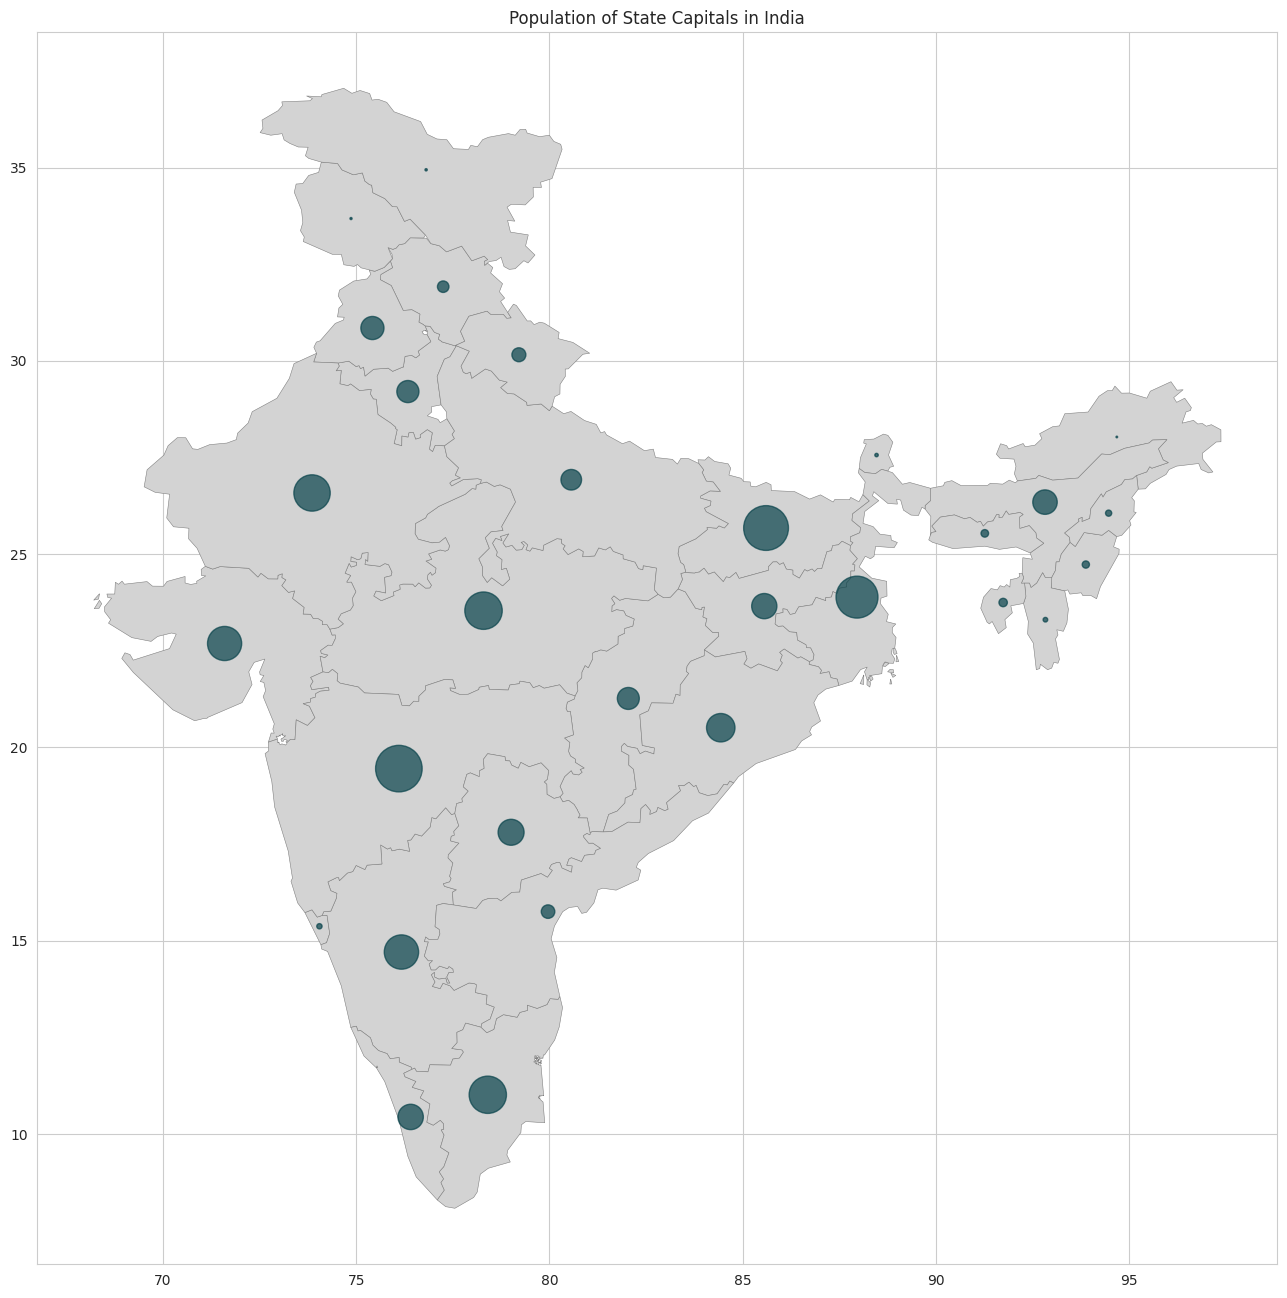

In [11]:
# map_with_pop.plot(column='st_nm', cmap='OrRd', figsize=(20,20), legend=True)
# plt.title("Population of State Capitals in India")
# plt.show()
fig, ax = plt.subplots(figsize=(16,16))
map_with_pop.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.4)
map_with_pop_bubble.plot(ax=ax,color='#07424A', markersize='Population_reduced',alpha=0.7, categorical=True, legend=True )
plt.title("Population of State Capitals in India")
plt.axis('equal')
plt.show()

# Question 2

Draw the connection graph of Go Air domestic flights of India from the database https://www.flygofirst.com/umbraco/surface/Schedule/Flightscheduledata

In [13]:
flight_df = pd.read_excel('/content/Flightschedule.xlsx')
flight_df.head()

,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,Abu Dhabi,Ahmedabad,G8 6,23:30,14:10,13:10,Via BOM,Sa,G8 247,2023-02-02,2023-02-05
1,Abu Dhabi,Ahmedabad,G8 6,23:30,14:35,13:35,Via BOM,"M,W,Th,F,Sa,Su",G8 2504,2023-02-02,2023-02-05
2,Abu Dhabi,Ahmedabad,G8 6,23:30,18:25,17:25,Via BOM,Daily,G8 364,2023-02-02,2023-02-05
3,Abu Dhabi,Ahmedabad,G8 6,23:30,08:55,07:55,Via BOM,Daily,G8 365,2023-02-02,2023-02-05
4,Abu Dhabi,Ahmedabad,G8 76,21:40,07:35,08:25,Via DEL,"M,Tu,W,Th,F,Su",G8 719,2023-02-02,2023-02-11


In [14]:
df = flight_df.drop(["Departure Time","Arrival Time", "Flight Time", "Days Of Operations", "Connection Flight No", "Effective From","EffectiveTo"],axis = 1)

In [ ]:
df.Origin.unique()
#abroad = 'Abu Dhabi','Bangkok','Dammam','Dubai','Kuwait','Male','Muscat','Phuket'
df.Destination.unique()
#abroad = 'Bangkok','Male','Abu Dhabi','Kuwait','Muscat','Phuket','Dammam','Dubai'

#Dropping international origins and destination flights

originAbroad = df[(df['Origin' == 'Abu Dhabi'])].index
temp = df.drop(originAbroad,inplace)
temp